# Outliers (5 - 15 pts)

### 1. Formulate definition of an outliers in dataset

Answer: 	A	data	object	that	deviates	significantly	from	the	normal	objects	

### 2. What three type of outliers you have to know?

List them. Give an detailed explanation for each of them.

Answer:


Global	outlier - 	significantly	deviates	from	the	rest	of	the	data	set, 


Contextual outlier - 	deviates	significantly	based	on	a	selected	context, 


Collective outlier - collectively	deviate	significantly	from	the	whole	data set,	even	if	the	individual	 data	objects	may	not	be	outliers

### 3. Generate three example datasets with outliers of each type.

1. Generate datasets using `numpy`
2. Plot these three demonstrations using `pyplot` 


In [2]:
import matplotlib.pyplot as plt
import numpy as np

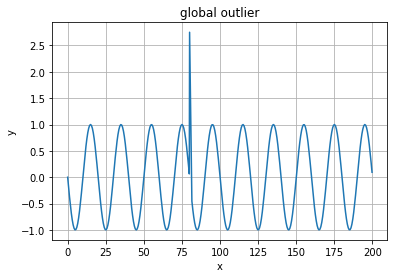

In [3]:
#### 1 type demonstration code
# Data for plotting
t = np.arange(0.0, 80.0, 0.6)
t1 = np.arange(80.0, 81.5, 1.5)
t2 = np.arange(81.5, 200.0, 0.6)

s = np.sin(0.1 * -np.pi * t)
s1 = 3 + np.sin(0.001 * -np.pi * t1)
s2 = np.sin(0.1 * -np.pi * t2)

s = np.append(s, s1)
s = np.append(s, s2)
t = np.append(t, t1)
t = np.append(t, t2)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='x', ylabel='y', title='global outlier')
ax.grid()

plt.show()

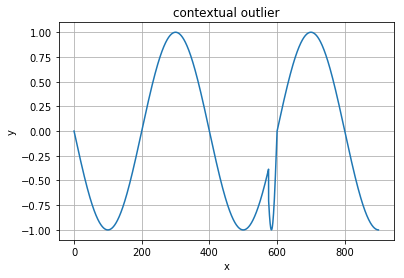

In [5]:
#### 2 type demonstration code
# Data for plotting
t = np.arange(0.0, 575.0, 0.6)
t1 = np.arange(575.0, 600.0, 0.5)
t2 = np.arange(600.0, 900.0, 0.6)

s = np.sin(0.005 * -np.pi * t)
s1 = np.sin(0.03 * np.pi * t1)
s2 = np.sin(0.005 * -np.pi * t2)

t = np.append(t, t1)
t = np.append(t, t2)

s = np.append(s, s1)
s = np.append(s, s2)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='x', ylabel='y', title='contextual outlier')
ax.grid()

plt.show()

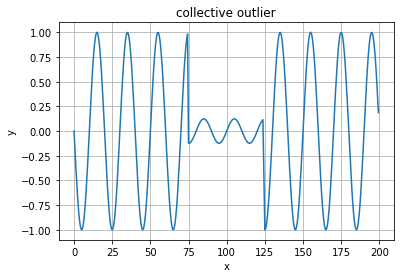

In [6]:
#### 3 type demonstration code
# Data for plotting
t = np.arange(0.0, 75.0, 0.6)
t1 = np.arange(75.0, 125.0, 1.25)
t2 = np.arange(125, 200.0, 0.6)

s = np.sin(0.1 * -np.pi * t)
s1 = np.sin(0.1 * np.pi * t1) * 0.125
s2 = np.sin(0.1 * -np.pi * t2)

s = np.append(s, s1)
s = np.append(s, s2)
t = np.append(t, t1)
t = np.append(t, t2)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='x', ylabel='y', title='collective outlier')
ax.grid()

plt.show()

### 4. Give 2-3 very specific realistic examples for each of types 

1st type examples:

Global outliers

- High flat price because a celebrity lived there
- Marathon running time of professional athlet against amateurs

2nd type examples:

Contextual outliers

- Warm days in March in Innopolis
- Short person in basketball team
- 50% of girls in IT university

3rd type examples:

Collective outliers

- 5 consecutive snow days
- Several days of consecutive sharp currency growth 

### 5. Develop model for outlier & outlier type detection

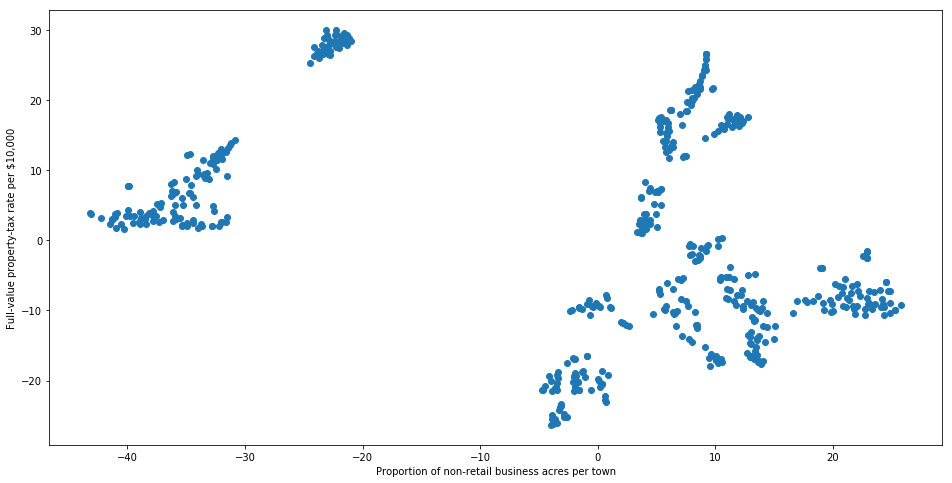

In [14]:
#### YOUR CODE HERE
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()
data = boston_df
embedded = TSNE(n_components=2).fit_transform(data)
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(embedded[:,0], embedded[:,1])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [15]:
def reachdist(distance_df, observation, index):
    return distance_df[observation][index]

In [16]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
data = boston_df
distance_metric = "cityblock" # Manhattan distance
distances = pdist(data.values, metric=distance_metric)
dist_matrix = squareform(distances) # square matrix
distance_df = pd.DataFrame(dist_matrix)
observations = distance_df.columns
lrd_dict = {}
n_dist_index = {}
reach_array_dict = {}

k = 3

In [17]:
for observation in observations:
        dist = distance_df[observation].nsmallest(k+1).iloc[k]
        indexes = distance_df[distance_df[observation] <= dist].drop(observation).index
        n_dist_index[observation] = indexes
    
        reach_dist_array = []
        for index in indexes:
            #make a function reachdist(observation, index)
            dist_between_observation_and_index = reachdist(distance_df, observation, index)
            dist_index =  distance_df[index].nsmallest(k+1).iloc[k]
            reach_dist = max(dist_index, dist_between_observation_and_index)
            reach_dist_array.append(reach_dist)
        lrd_observation = len(indexes)/sum(reach_dist_array)
        reach_array_dict[observation] = reach_dist_array
        lrd_dict[observation] = lrd_observation

In [18]:
LOF_dict = {}
for observation in observations:
    lrd_array = []
    for index in n_dist_index[observation]:
        lrd_array.append(lrd_dict[index])
    LOF = sum(lrd_array)*sum(reach_array_dict[observation])/np.square(len(n_dist_index[observation]))
    LOF_dict[observation] = LOF

In [19]:
outliers = sorted(LOF_dict.items(), key=lambda x: x[1], reverse=True)[:10]

In [20]:
labels = [0 for i in range(data.shape[0])]
for i, outlier in enumerate(outliers):
    outlier_id = outlier[0]
    labels[outlier_id] = 1

In [21]:
outlier_data = embedded[[i for i in range(boston_df.shape[0]) if labels[i]==1]]
non_outlier_data = embedded[[i for i in range(boston_df.shape[0]) if labels[i]==0]]

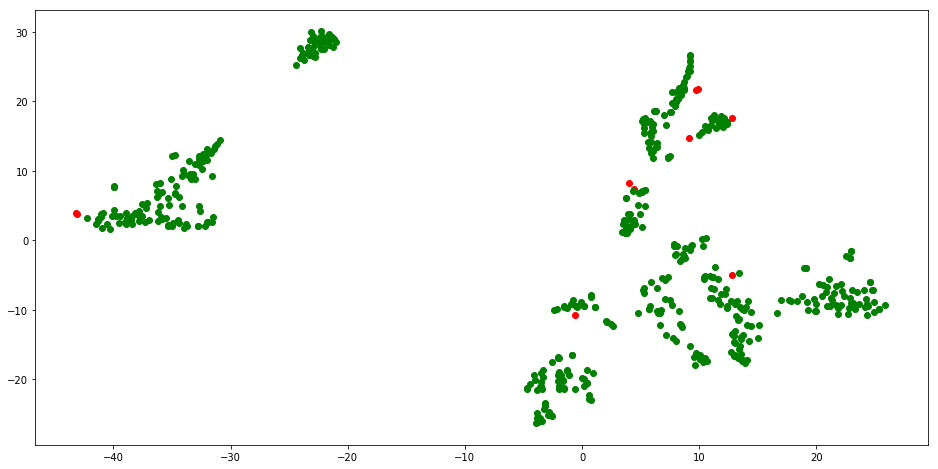

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(outlier_data[:,0], outlier_data[:,1], c='red' )
ax.scatter(non_outlier_data[:,0], non_outlier_data[:,1], c='green' )
plt.show()

### 6. Discuss results



- Results are super!!! 